In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import P201_Functions as p201

In [2]:
# Reads the name of the csv file and get the data
df = pd.read_csv("./Pendulum_data_Run1.csv")

# Prints information about the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Time (s) Run #1                  343 non-null    float64
 1   State Run #1                     343 non-null    float64
 2   Block Event Times (s) Run #1     172 non-null    float64
 3   Period (s) Run #1                85 non-null     float64
 4   Block-to-Block Times (s) Run #1  171 non-null    float64
 5   Speed (m/s) Run #1               171 non-null    float64
 6   Time in Gate (s) Run #1          171 non-null    float64
dtypes: float64(7)
memory usage: 18.9 KB


In [3]:
# Drop columns other than the useful ones (time and period)
df2=df.drop(['State Run #1','Block Event Times (s) Run #1','Block-to-Block Times (s) Run #1','Speed (m/s) Run #1','Time in Gate (s) Run #1'],axis=1)

# Filter the data to remove rows without good period values (i.e. not NaN)
df3=df2[df2['Period (s) Run #1']<100.0]

# Some trickery to get the time and period into 1D numpy arrays for plotting/fitting purposes.
conv_arr= df3.values

xi = np.delete(conv_arr,[1],axis=1) 
yi = np.delete(conv_arr,[0],axis=1)
xi = xi.ravel()
yi = yi.ravel()


# add error bars on the time and period (1/2 smallest division in data)
sigmax = [0.0005 for i in range(len(xi))]
sigmai = [0.005 for i in range(len(xi))]

Constant Fit: Coefficients (from curve_fit)
[7.23117647]
Constant Fit: Covariance Matrix (from curve_fit)
[[2.94117645e-07]]

Constant Fit: Final Result: y = (7.23118 +/- 0.00054)



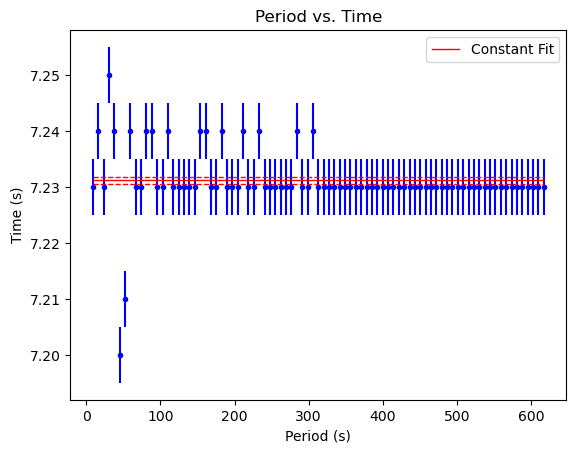

In [4]:
# Plot the data, with error bars, and add appropriate labels
plt.errorbar(xi,yi,sigmai,sigmax,'b.')

plt.ylabel('Time (s)')
plt.xlabel('Period (s)')
plt.title('Period vs. Time')

# Takes the x and y values, with errors in y, and make a constant fit.  The last two parameters are
# the x_low and x_high range to fit over!  This first one is for the entire range.
intercept, dintercept = p201.constant_fit_plot_errors(xi,yi,sigmai,plt,0.0,800.0)

# Adds the legend to the plot
plt.legend()

# Displays the plot
plt.show()



Constant Fit: Coefficients (from curve_fit)
[7.23111111]
Constant Fit: Covariance Matrix (from curve_fit)
[[3.47222222e-07]]

Constant Fit: Final Result: y = (7.23111 +/- 0.00059)



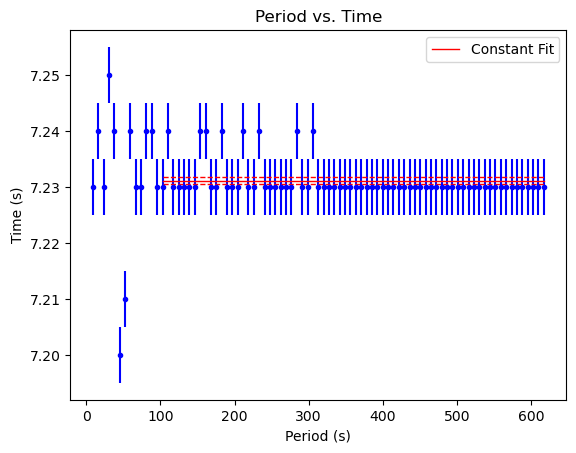

In [5]:
# Same as the previous cell, but with a reduced range of times, to remove the first 100 seconds
# from the fit.

plt.errorbar(xi,yi,sigmai,sigmax,'b.')

plt.ylabel('Time (s)')
plt.xlabel('Period (s)')
plt.title('Period vs. Time')

# Takes the x and y values to make a trendline
intercept2, dintercept2 = p201.constant_fit_plot_errors(xi,yi,sigmai,plt,100.0,800.0)

# Adds the legend to the plot
plt.legend()

# Displays the plot
plt.show()

Linear Fit: Coefficients (from curve_fit)
[ 7.23384671e+00 -7.60173956e-06]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 2.33692591e-06 -5.52903674e-09]
 [-5.52903674e-09  1.53642210e-11]]

Linear Fit: Final Result: y = (-0.00001 +/- 0.00000) x + (7.23385 +/- 0.00153)



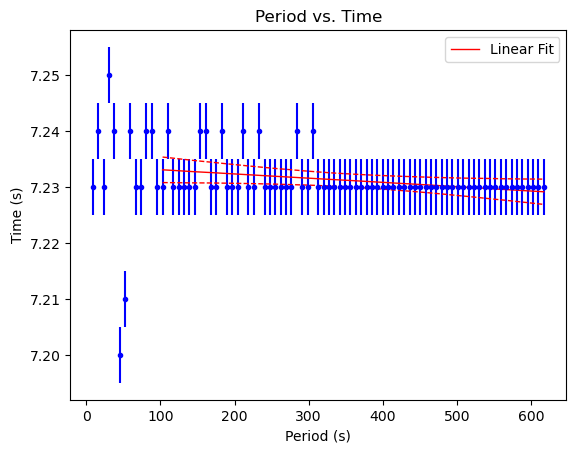

In [6]:
# Same as the previous cell, but with a linear fit, instead of a constant fit.

plt.errorbar(xi,yi,sigmai,sigmax,'b.')

plt.ylabel('Time (s)')
plt.xlabel('Period (s)')
plt.title('Period vs. Time')

# Takes the x and y values to make a trendline
intercept3, slope3, dintercept3, dslope3 = p201.linear_fit_plot_errors(xi,yi,sigmai,plt,100.0,800.0)

# Adds the legend to the plot
plt.legend()

# Displays the plot
plt.show()